In [1]:
import torch
import numpy as np
from matplotlib import pyplot as plt 
# tensor1 = torch.tensor([1, 3, 5, 7, 9])
# tensor2 = torch.tensor([1, 2, 3, 6, 5])

# result = np.intersect1d(tensor1, tensor2)
# result

In [2]:
#f:  s: segmentation map
f_sample=np.load("/home/gaussian-grouping/data/lerf_mask/figurines/language_features/frame_00001_f.npy")
s_sample=np.load("/home/gaussian-grouping/data/lerf_mask/figurines/language_features/frame_00001_s.npy")
 #seg map 은 인덱스 맵인가 => no 그런 개념이 아님 
f_sample.shape, s_sample.shape

((279, 512), (4, 728, 986))

In [3]:
#f:  s: segmentation map
f_sample1=np.load("/home/gaussian-grouping/data/lerf_mask/figurines/language_features_dim3/frame_00001_f.npy")
s_sample1=np.load("/home/gaussian-grouping/data/lerf_mask/figurines/language_features_dim3/frame_00001_s.npy")
f_sample2=np.load("/home/gaussian-grouping/data/lerf_mask/figurines/language_features_dim3/frame_00002_f.npy")
s_sample2=np.load("/home/gaussian-grouping/data/lerf_mask/figurines/language_features_dim3/frame_00002_s.npy")
f_sample3=np.load("/home/gaussian-grouping/data/lerf_mask/figurines/language_features_dim3/frame_00003_f.npy")
s_sample3=np.load("/home/gaussian-grouping/data/lerf_mask/figurines/language_features_dim3/frame_00003_s.npy")
f_sample4=np.load("/home/gaussian-grouping/data/lerf_mask/figurines/language_features_dim3/frame_00004_f.npy")
s_sample4=np.load("/home/gaussian-grouping/data/lerf_mask/figurines/language_features_dim3/frame_00004_s.npy")
f_sample5=np.load("/home/gaussian-grouping/data/lerf_mask/figurines/language_features_dim3/frame_00005_f.npy")
s_sample5=np.load("/home/gaussian-grouping/data/lerf_mask/figurines/language_features_dim3/frame_00005_s.npy")

In [4]:
h,w = s_sample.shape[1:] 
y, x = torch.meshgrid(torch.arange(0, h), torch.arange(0, w))
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)
seg_map1 = torch.from_numpy(s_sample1)
feature_map1 = torch.from_numpy(f_sample1)
seg1 = seg_map1[:, y, x].squeeze(-1).long()
mask1 = seg1 != -1
point_feature1 = feature_map1[seg1[0:1]].squeeze(0)

seg_map2 = torch.from_numpy(s_sample2)
feature_map2 = torch.from_numpy(f_sample2)
seg2 = seg_map2[:, y, x].squeeze(-1).long()
mask2 = seg2 != -1
point_feature2 = feature_map2[seg2[0:1]].squeeze(0)

seg_map3 = torch.from_numpy(s_sample3)
feature_map3 = torch.from_numpy(f_sample3)
seg3 = seg_map3[:, y, x].squeeze(-1).long()
mask3 = seg3 != -1
point_feature3 = feature_map3[seg3[0:1]].squeeze(0)

seg_map4 = torch.from_numpy(s_sample4)
feature_map4 = torch.from_numpy(f_sample4)
seg4 = seg_map4[:, y, x].squeeze(-1).long()
mask4 = seg4 != -1
point_feature4 = feature_map4[seg4[0:1]].squeeze(0)

seg_map5 = torch.from_numpy(s_sample5)
feature_map5 = torch.from_numpy(f_sample5)
seg5 = seg_map5[:, y, x].squeeze(-1).long()
mask5 = seg5 != -1
point_feature5 = feature_map1[seg5[0:1]].squeeze(0)
# if feature_level == 0: # default
#     point_feature1 = feature_map[seg[0:1]].squeeze(0)
#     mask = mask[0:1].reshape(1, self.image_height, self.image_width)
# elif feature_level == 1: # s
#     point_feature1 = feature_map[seg[1:2]].squeeze(0)
#     mask = mask[1:2].reshape(1, self.image_height, self.image_width)
# elif feature_level == 2: # m
#     point_feature1 = feature_map[seg[2:3]].squeeze(0)
#     mask = mask[2:3].reshape(1, self.image_height, self.image_width)
# elif feature_level == 3: # l
#     point_feature1 = feature_map[seg[3:4]].squeeze(0)
#     mask = mask[3:4].reshape(1, self.image_height, self.image_width)
# else:
#     raise ValueError("feature_level=", feature_level)
# # point_feature = torch.cat((point_feature2, point_feature3, point_feature4), dim=-1).to('cuda')
# point_feature = point_feature1.reshape(self.image_height, self.image_width, -1).permute(2, 0, 1)

/opt/conda/envs/feature_gs/lib/python3.11/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [29]:
point_feature1 = point_feature1.reshape(h,w, -1)
point_feature2 = point_feature2.reshape(h,w, -1)
point_feature3 = point_feature3.reshape(h,w, -1)
point_feature4 = point_feature4.reshape(h,w, -1)
point_feature5 = point_feature5.reshape(h,w, -1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


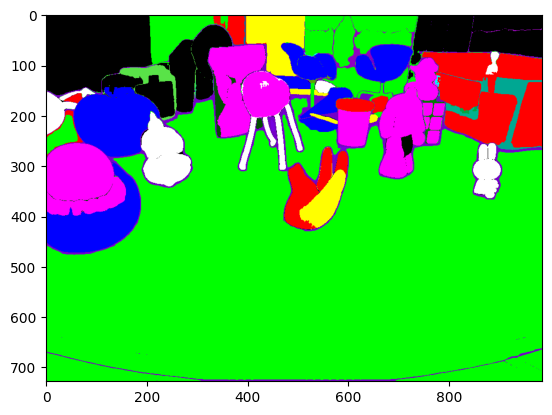

In [84]:
plt.imshow(point_feature3*s_sample3[1][...,None])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


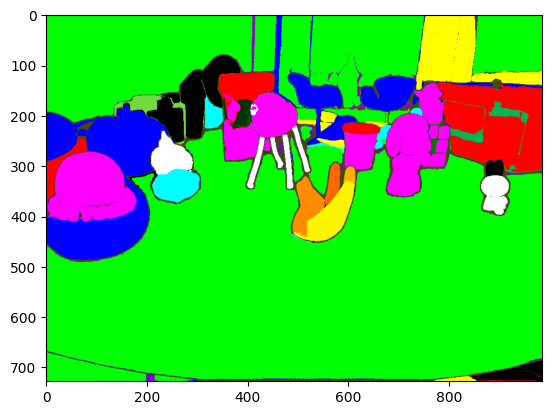

In [80]:
mask = (point_feature2*s_sample2[1][...,None]) == (point_feature2*s_sample2[1][...,None])[410,11,:]
plt.imshow((point_feature2*s_sample2[1][...,None]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


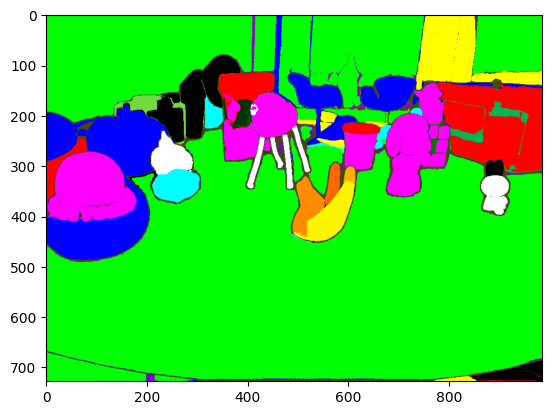

In [47]:
plt.imshow(point_feature2*s_sample2[1][...,None])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


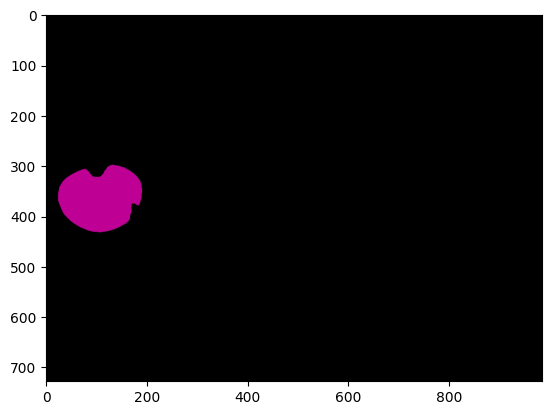

In [42]:
plt.imshow(point_feature5*(s_sample5[0] == 1)[...,None])

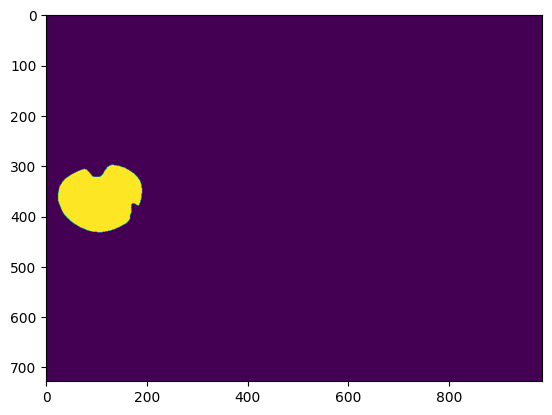

In [38]:
plt.imshow(s_sample5[0] == 1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


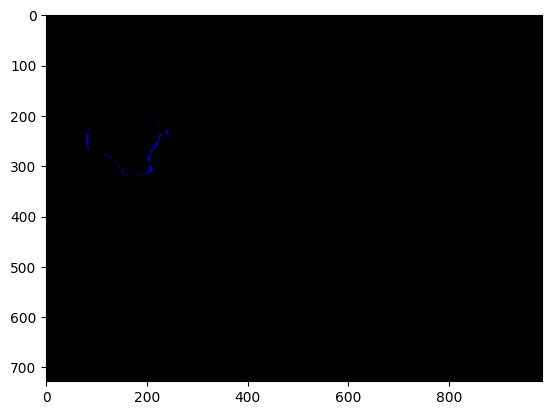

In [31]:
plt.imshow(point_feature2*(s_sample2[0] == 1)[...,None])

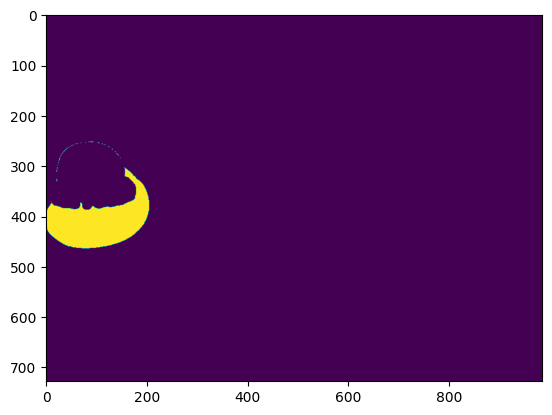

In [18]:
plt.imshow(s_sample3[0] * (s_sample3[0]==1))

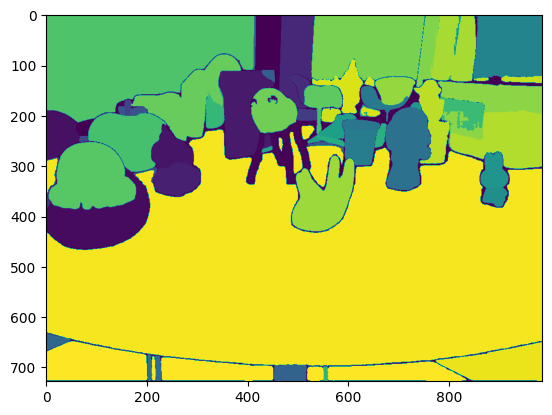

In [11]:
plt.imshow(s_sample3[0])

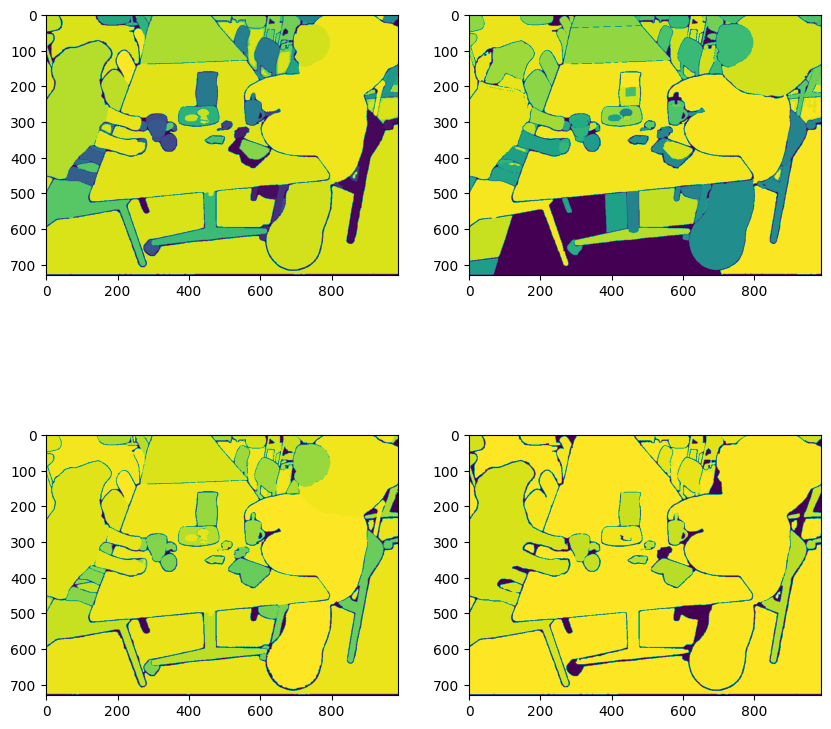

In [4]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
for i in range(4):
    axs[i//2, i%2].imshow(s_sample[i])

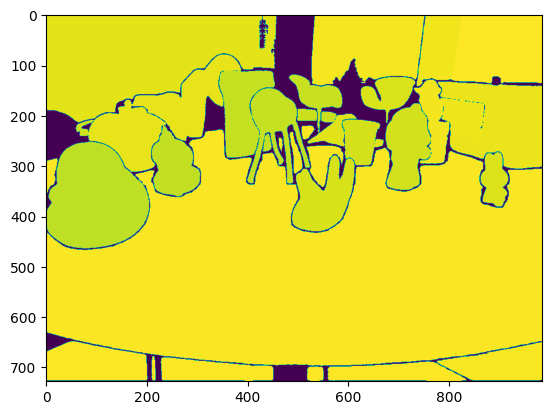

In [30]:
plt.imshow(s_sample[3])

In [5]:
#f:  s: segmentation map
from glob import glob
f_list = sorted(glob("/home/gaussian-grouping/data/lerf_mask/figurines/language_features/*_f.npy"))
s_list = sorted(glob("/home/gaussian-grouping/data/lerf_mask/figurines/language_features/*_s.npy"))

In [6]:
def get_language_feature(s, f, feature_level, h,w):
    seg_map = torch.from_numpy(s)
    feature_map = torch.from_numpy(f)

    y, x = torch.meshgrid(torch.arange(0, h), torch.arange(0, w))
    x = x.reshape(-1, 1)
    y = y.reshape(-1, 1)
    seg = seg_map[:, y, x].squeeze(-1).long()
    mask = seg != -1
    if feature_level == 0: # default
        point_feature1 = feature_map[seg[0:1]].squeeze(0)
        mask = mask[0:1].reshape(1, h, w)
    elif feature_level == 1: # s
        point_feature1 = feature_map[seg[1:2]].squeeze(0)
        mask = mask[1:2].reshape(1, h, w)
    elif feature_level == 2: # m
        point_feature1 = feature_map[seg[2:3]].squeeze(0)
        mask = mask[2:3].reshape(1, h, w)
    elif feature_level == 3: # l
        point_feature1 = feature_map[seg[3:4]].squeeze(0)
        mask = mask[3:4].reshape(1, h, w)
    else:
        raise ValueError("feature_level=", feature_level)
    # point_feature = torch.cat((point_feature2, point_feature3, point_feature4), dim=-1).to('cuda')
    point_feature = point_feature1.reshape(h, w, -1).permute(2, 0, 1)
    
    return point_feature, mask, seg_map[feature_level]

In [ ]:
for class_id in torch.unique(seg): # obj id 0인경우 > class_objects에서 마스킹 됨
    class_objects = torch.where(seg == class_id)

In [16]:
id= torch.unique(seg*mask)[1]
torch.where(seg == )

(tensor([253, 253, 253,  ..., 464, 464, 464]),
 tensor([84, 87, 88,  ..., 84, 85, 86]))

In [7]:
f_0 = f_list[0]; s_0 = s_list[0]
f_1 = f_list[1]; s_1 = s_list[1]
f_0= np.load(f_0)
s_0= np.load(s_0)
f_1= np.load(f_1)
s_1= np.load(s_1)
f_map, mask,seg = get_language_feature(s_0,f_0, 0, h,w)

In [129]:
mask.shape

torch.Size([1, 728, 986])

In [130]:
seg.shape

torch.Size([728, 986])

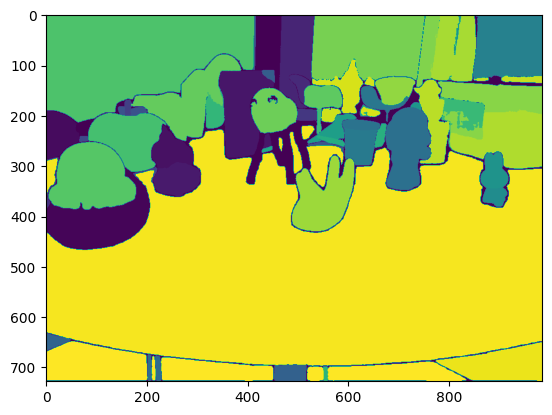

In [136]:
plt.imshow((seg*mask)[0])

In [131]:
torch.unique(seg)

tensor([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
        27., 28., 30., 31., 33., 34., 35., 36., 38., 39., 40., 41., 42., 43.,
        44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56., 57.,
        58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68.])

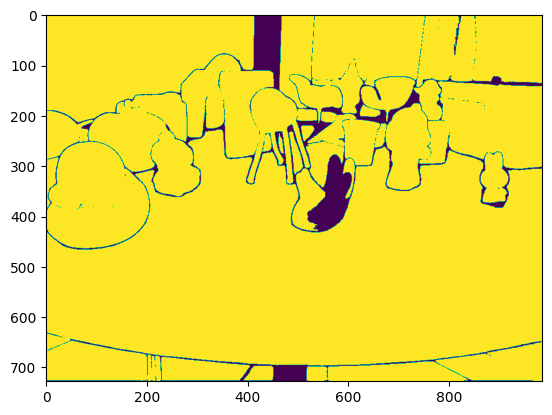

In [109]:
plt.imshow(seg_map.permute(1,2,0))

In [92]:
for idx, (f,s) in enumerate(zip(f_list, s_list)):
    f= np.load(f)
    s= np.load(s)
    f_map, seg_map = get_language_feature(s,f, 1, h,w)
    


SyntaxError: incomplete input (3637930463.py, line 2)